# E-Commerce Data Shipping Forecasting

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

## Data Cleaning

In [25]:
# Read dataframe

df = pd.read_csv('Train_Ecommerce.csv')
df.rename(columns={'Reached.on.Time_Y.N': 'Delayed'}, inplace=True)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Delayed
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [26]:
# Verify object types and null values count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Delayed              10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [27]:
# Check null values per column
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Delayed                0
dtype: int64

In [28]:
# Verify duplicated rows
df.duplicated().sum()

0

In [29]:
# Verify duplicated IDs
df['ID'].duplicated().sum()

0

In [30]:
# Drop ID Column
df.drop('ID', axis = 1, inplace = True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Delayed
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


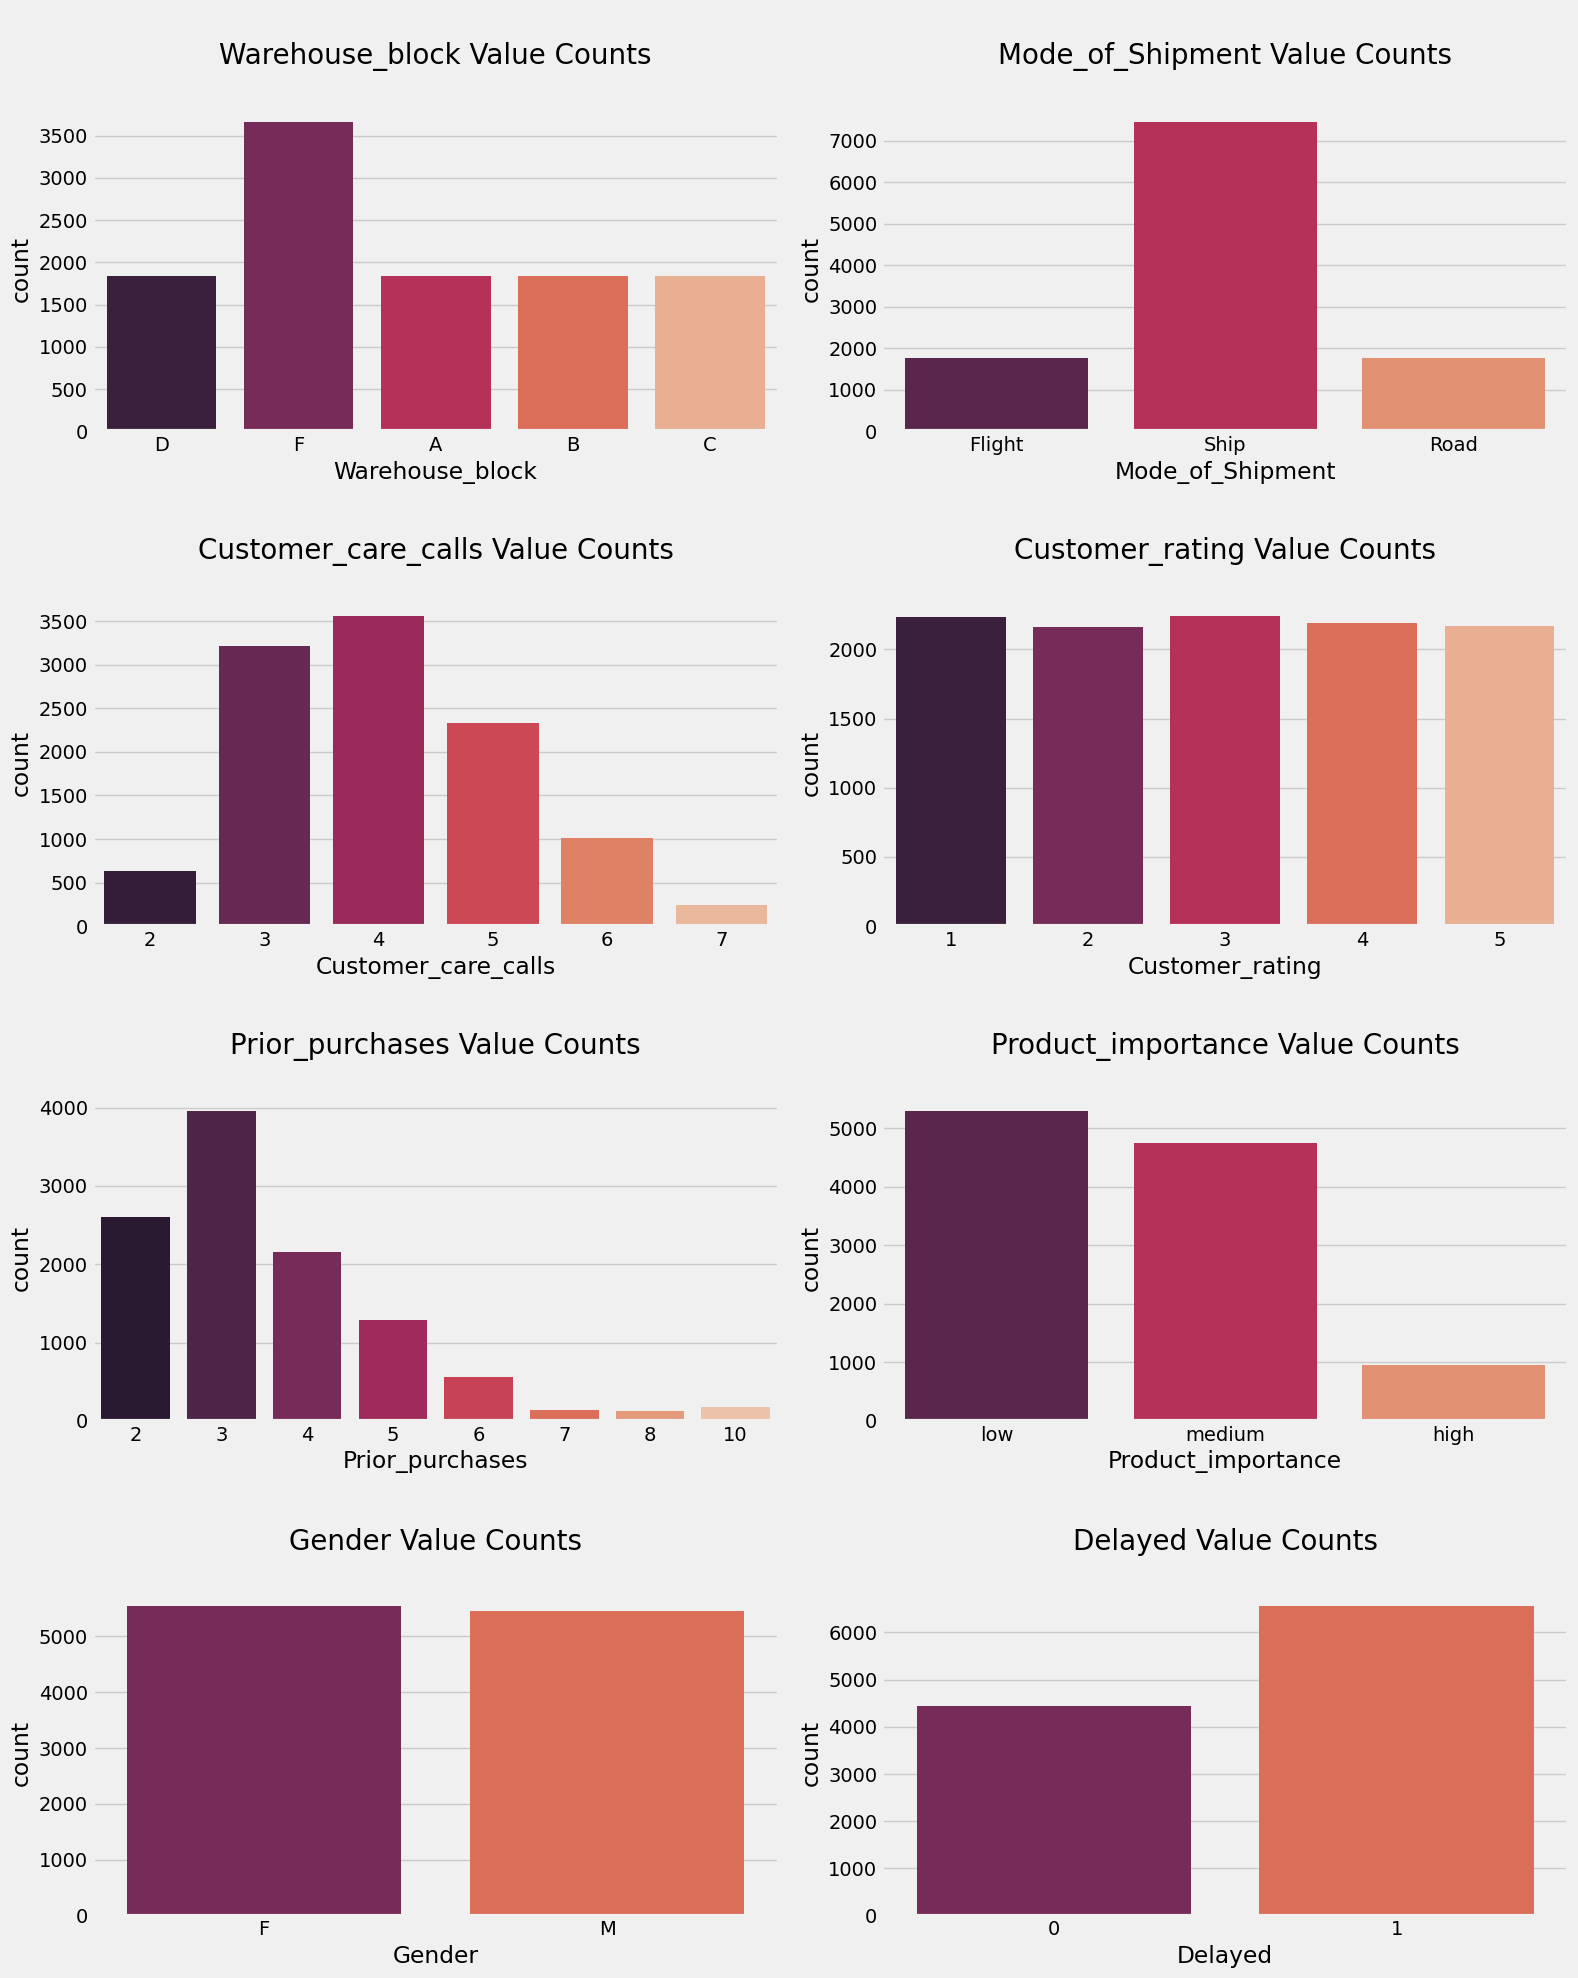

In [31]:
# here by these plots we are lookin at the counts of each categories in the categorical columns
# creating a list of categorical coumns
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Delayed']

plt.figure(figsize = (16, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} Value Counts\n", fontsize = 20)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [32]:
# creating a list of categorical coumns
object_columns = df.select_dtypes(include = ['object'])
object_columns.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


In [33]:
# looking at the warehouse column and what are the categories present in it

warehouse = object_columns['Warehouse_block'].value_counts().reset_index()
warehouse.columns = ['warehouse', 'value_counts']
fig = px.pie(warehouse, names = 'warehouse', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
             hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

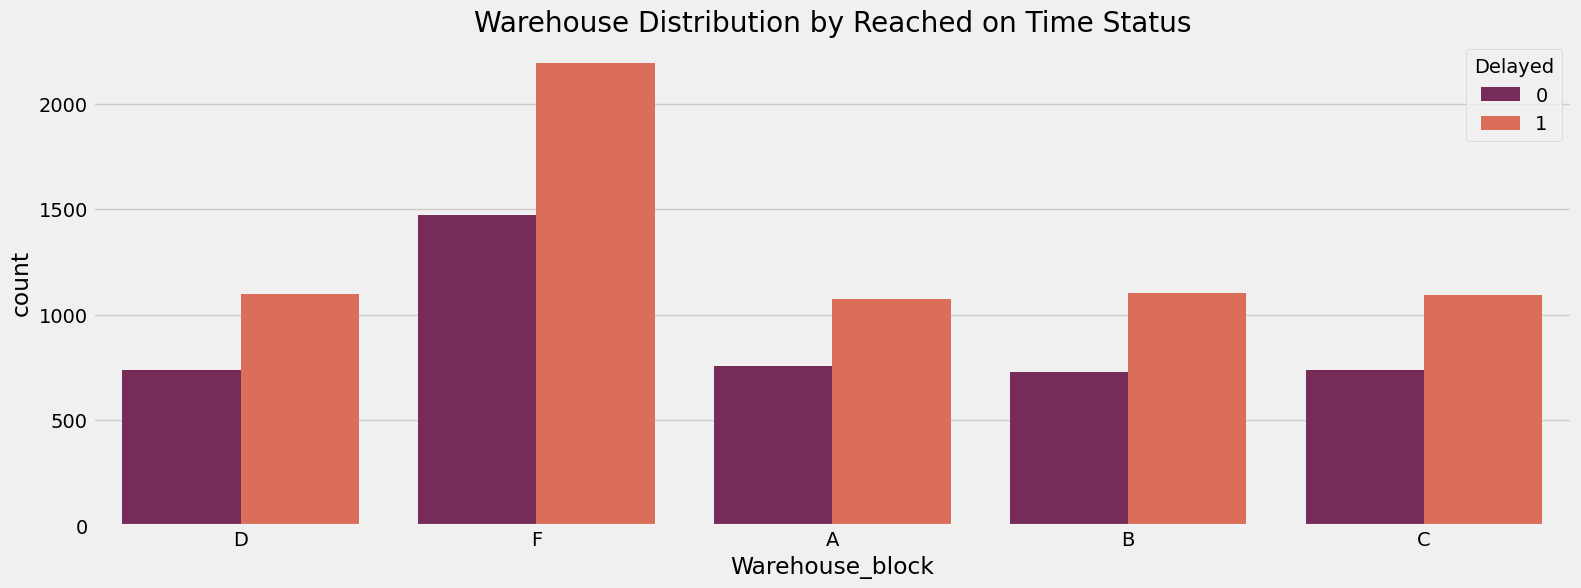

In [34]:
# making a countplot of warehouse column and see the effect of Reached on time or not on the warehouse column.
plt.figure(figsize=(17, 6))
sns.countplot(x="Warehouse_block", hue="Delayed", data=df, palette="rocket")
plt.title("Warehouse Distribution by Reached on Time Status")  # Optional title
plt.show()

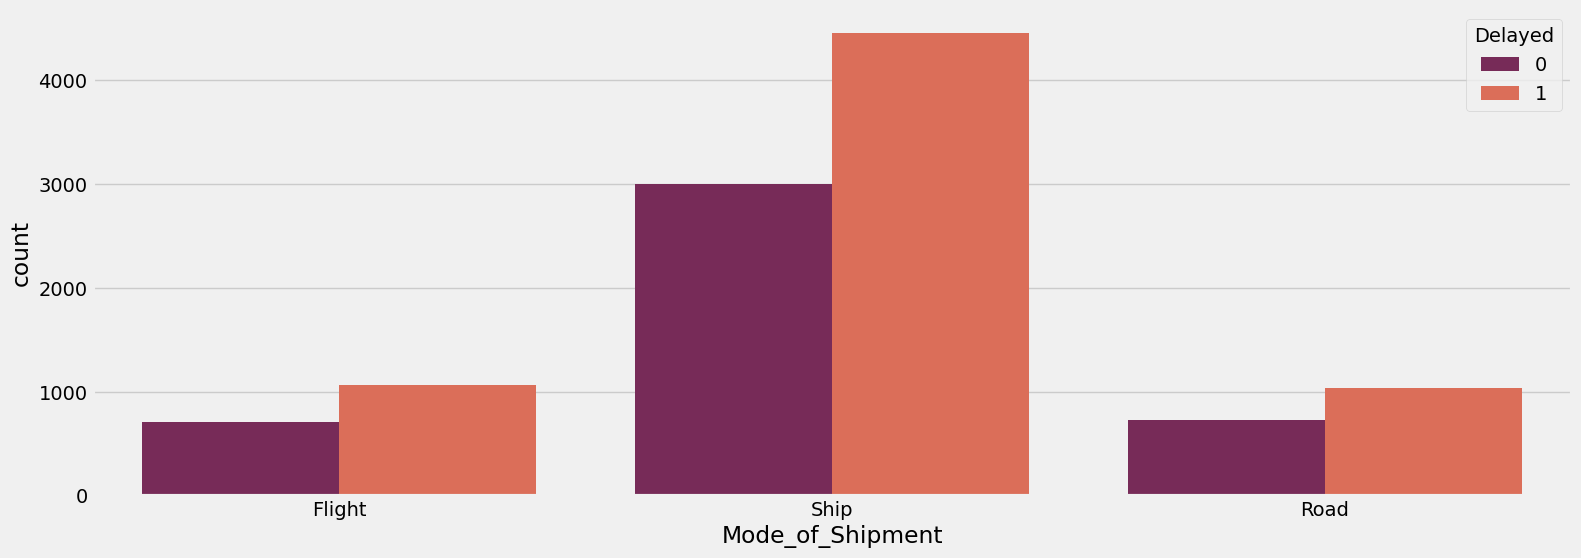

In [35]:
# making a countplot of mode of shipment column and see the effect of Reached on time or not on the warehouse column.

plt.figure(figsize = (17, 6))
sns.countplot(x='Mode_of_Shipment', hue = 'Delayed', data = df, palette='rocket')
plt.show()

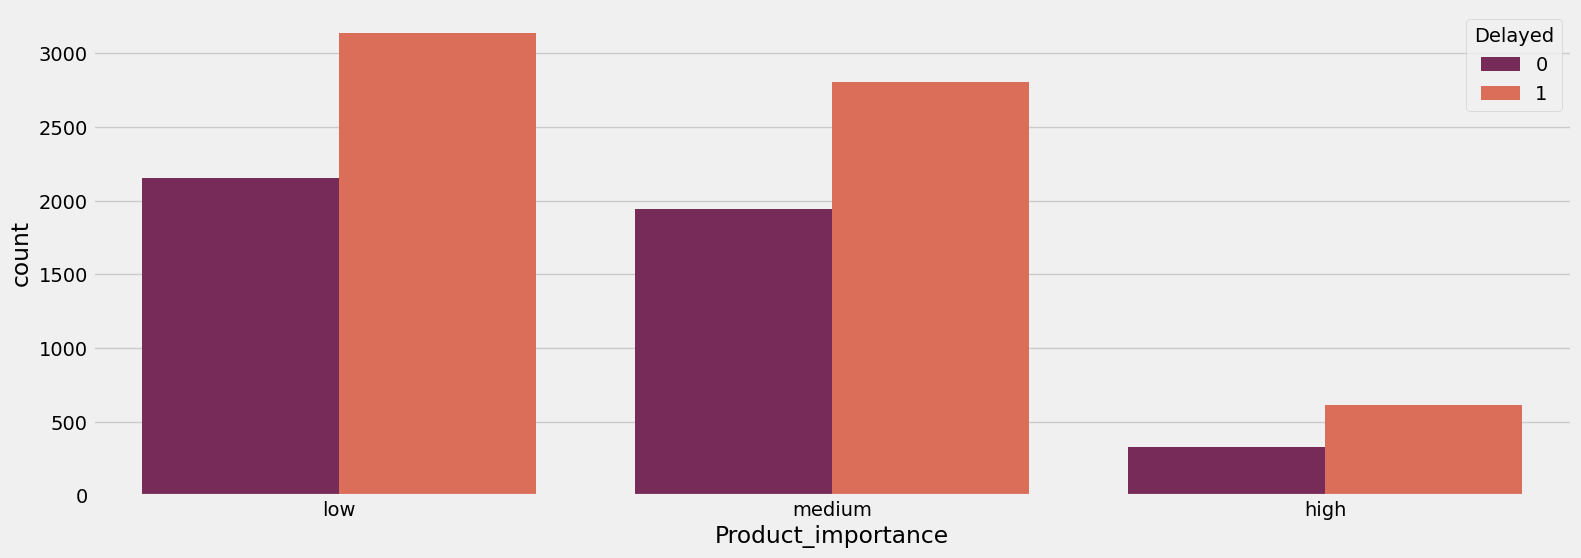

In [36]:
# making a countplot of product importance column and see the effect of Reached on time or not on the warehouse column.
plt.figure(figsize = (17, 6))
sns.countplot(x='Product_importance', hue = 'Delayed', data = df, palette='rocket')
plt.show()

In [37]:
# creating a list of continuous columns

integer_columns = df.select_dtypes(include = ['int64'])
integer_columns.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Delayed
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1


In [38]:
# looking at the customer care calls column and what are the categories present in it

customer_care = integer_columns['Customer_care_calls'].value_counts().reset_index()
customer_care.columns = ['Customer_care_calls', 'value_counts']
fig = px.pie(customer_care, names = 'Customer_care_calls', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
            hole = 0.5)
fig.update_traces(textinfo = 'percent+label')


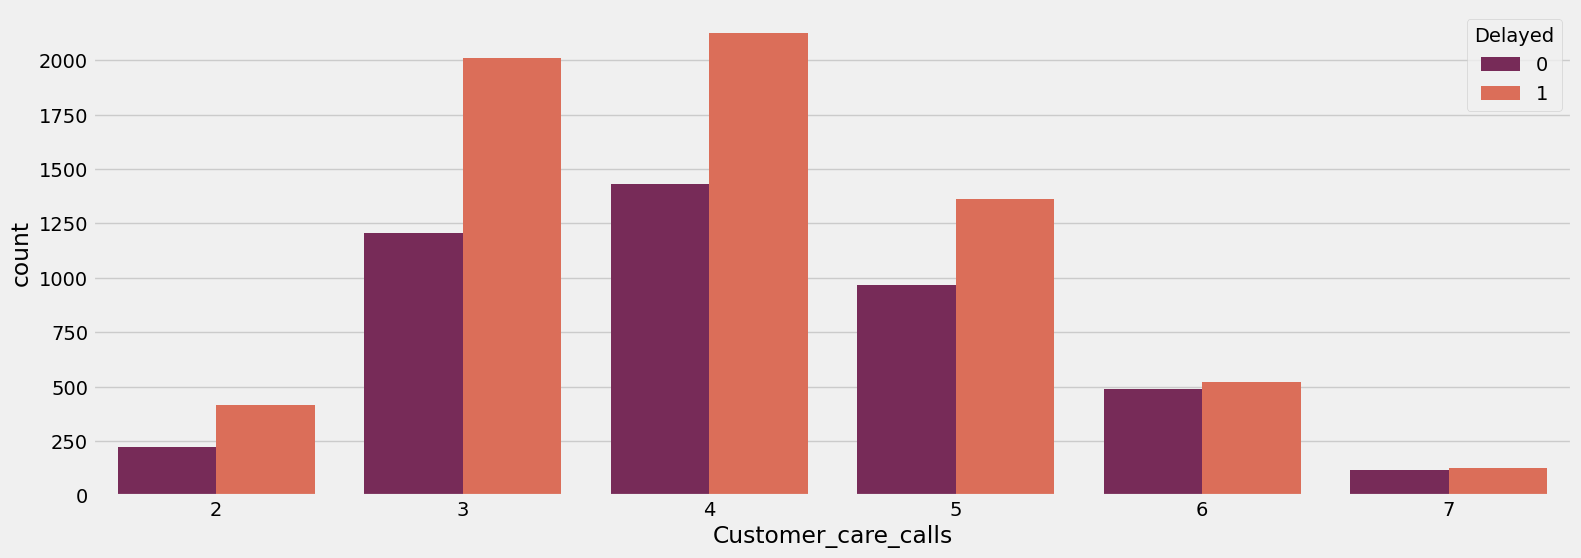

In [39]:
# making a countplot of customer care calls column and see the effect of Reached on time or not on the warehouse column.

plt.figure(figsize = (17, 6))
sns.countplot(x='Customer_care_calls', hue = 'Delayed', data = df, palette='rocket')
plt.show()

In [40]:
# looking at the reached on time or not column and what are the categories present in it

reached_on_time_y_n = integer_columns['Delayed'].value_counts().reset_index()
reached_on_time_y_n.columns = ['Delayed', 'value_counts']
fig = px.pie(reached_on_time_y_n, names = 'Delayed', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.Darkmint_r, width = 650, height = 400,
            hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

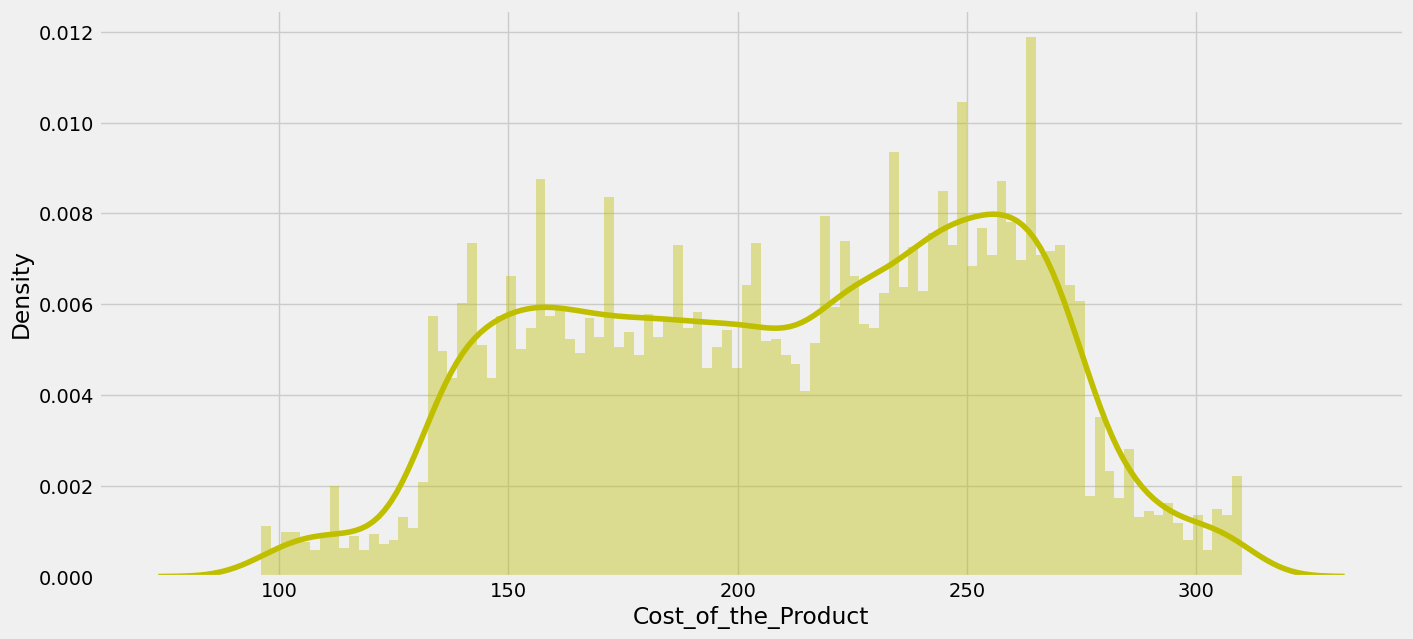

In [41]:
# making a distplot of cost of the product column

plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Cost_of_the_Product'], bins = 100, color = 'y')

plt.show()

In [42]:
# looking at the relation between cost of the product and whether the product reached on time or not using boxplot

px.box(data_frame = df, x = 'Delayed', y = 'Cost_of_the_Product',
       color = 'Delayed', template = 'plotly_dark')

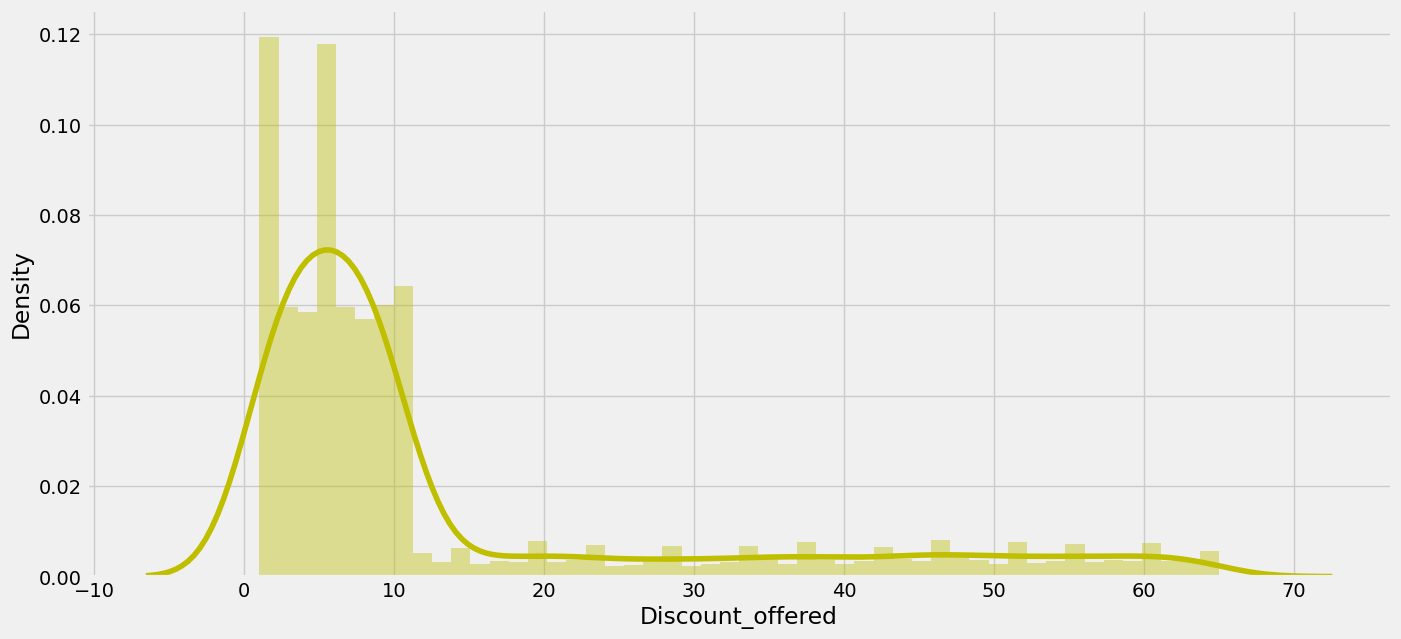

In [43]:
# making a distplot of discount offered column

plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Discount_offered'], color = 'y')

plt.show()

In [44]:
# looking at the relation between discount offered and whether the product reached on time or not using boxplot

px.box(data_frame = df, x = 'Delayed', y = 'Discount_offered',
       color = 'Delayed', template = 'plotly_dark')

## Data Preparation

### Label the data

In [45]:
df['Warehouse_block'] = df['Warehouse_block'].map({'A' : 0, 'B': 1, 'C': 2, 'D':3, 'F': 4})
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].map({'Flight' : 0, 'Ship': 1, 'Road': 2})
df['Product_importance'] = df['Product_importance'].map({'low' : 0, 'medium': 1, 'high': 2})
df['Gender'] = df['Gender'].apply(lambda val: 1 if val == 'M' else 0)

In [46]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Delayed
0,3,0,4,2,177,3,0,0,44,1233,1
1,4,0,4,5,216,2,0,1,59,3088,1
2,0,0,2,2,183,4,0,1,48,3374,1
3,1,0,3,3,176,4,1,1,10,1177,1
4,2,0,2,2,184,3,1,0,46,2484,1


In [47]:
# creating features and label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Forecasting the data


In [48]:
# spiltting our data into training and test data

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [49]:
# Scaling the data using standardscaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Algorithms

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)



KNN_accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", KNN_accuracy)

Accuracy: 0.6498181818181819


In [51]:
#Now implement Logistic regression using the same data
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_log= log_reg.predict(X_test)

 # Evaluate the model's performance
log_accuracy = accuracy_score(y_test, y_pred_log)
# Print the accuracy
print("Accuracy:", log_accuracy)

Accuracy: 0.633090909090909


In [52]:
#Now implement XGBoost using the same data
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb= xgb.predict(X_test)

# Evaluate the model's performance
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
# Print the accuracy
print("Accuracy:", xgb_accuracy)


Accuracy: 0.6803636363636364


In [53]:
#Now implement Random Forest using the same data
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf= rf.predict(X_test)

# Evaluate the model's performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
# Print the accuracy
print("Accuracy:", rf_accuracy)

Accuracy: 0.6549090909090909


In [54]:
#Now implement Decision Tree using the same data
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt= dt.predict(X_test)

# Evaluate the model's performance
dt_accuracy = accuracy_score(y_test, y_pred_dt)
# Print the accuracy
print("Accuracy:", dt_accuracy)

Accuracy: 0.6418181818181818


In [55]:
#Now implement SVM using the same data
from sklearn.svm import SVC
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm= svm.predict(X_test)

# Evaluate the model's performance
svm_accuracy = accuracy_score(y_test, y_pred_svm)
# Print the accuracy
print("Accuracy:", svm_accuracy)

Accuracy: 0.6727272727272727


In [56]:
#Now implement Naive Bayes using the same data
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb= nb.predict(X_test)

# Evaluate the model's performance
nb_accuracy = accuracy_score(y_test, y_pred_nb)
# Print the accuracy
print("Accuracy:", nb_accuracy)

Accuracy: 0.6443636363636364


In [57]:
#Now implement Gradient Boosting using the same data
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

# Train the model
gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb= gb.predict(X_test)

# Evaluate the model's performance
gb_accuracy = accuracy_score(y_test, y_pred_gb)
# Print the accuracy
print("Accuracy:", gb_accuracy)

Accuracy: 0.6792727272727273


In [58]:
#Now implement AdaBoost using the same data
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()

# Train the model
ab.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ab= ab.predict(X_test)

# Evaluate the model's performance
ab_accuracy = accuracy_score(y_test, y_pred_ab)
# Print the accuracy
print("Accuracy:", ab_accuracy)


Accuracy: 0.6774545454545454


In [59]:
#Now implement Bagging using the same data
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()

# Train the model
bg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_bg= bg.predict(X_test)

# Evaluate the model's performance
bg_accuracy = accuracy_score(y_test, y_pred_bg)
# Print the accuracy
print("Accuracy:", bg_accuracy)

Accuracy: 0.6556363636363637


In [60]:
#Now implement Extra Trees using the same data
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()

# Train the model
et.fit(X_train, y_train)

# Make predictions on the test data
y_pred_et= et.predict(X_test)

# Evaluate the model's performance
et_accuracy = accuracy_score(y_test, y_pred_et)
# Print the accuracy
print("Accuracy:", et_accuracy)


Accuracy: 0.6498181818181819


In [61]:
#Now implement Voting Classifier using the same data
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('knn', knn), ('log_reg', log_reg), ('xgb', xgb), ('rf', rf), ('dt', dt), ('svm', svm),
                                  ('nb', nb), ('gb', gb), ('ab', ab), ('bg', bg), ('et', et)], voting='hard')

# Train the model
vc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_vc= vc.predict(X_test)

# Evaluate the model's performance
vc_accuracy = accuracy_score(y_test, y_pred_vc)
# Print the accuracy
print("Accuracy:", vc_accuracy)

Accuracy: 0.6741818181818182


In [62]:
#Now implement Stacking Classifier using the same data
from sklearn.ensemble import StackingClassifier
sc = StackingClassifier(estimators=[('knn', knn), ('log_reg', log_reg), ('xgb', xgb), ('rf', rf), ('dt', dt), ('svm', svm),
                                  ('nb', nb), ('gb', gb), ('ab', ab), ('bg', bg), ('et', et)], final_estimator=GradientBoostingClassifier())

# Train the model
sc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_sc= sc.predict(X_test)

# Evaluate the model's performance
sc_accuracy = accuracy_score(y_test, y_pred_sc)
# Print the accuracy
print("Accuracy:", sc_accuracy)


Accuracy: 0.6767272727272727


In [63]:
#Now implement MLP Classifier using the same data
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mlp= mlp.predict(X_test)

# Evaluate the model's performance
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
# Print the accuracy
print("Accuracy:", mlp_accuracy)


Accuracy: 0.6498181818181819


## Graph the results

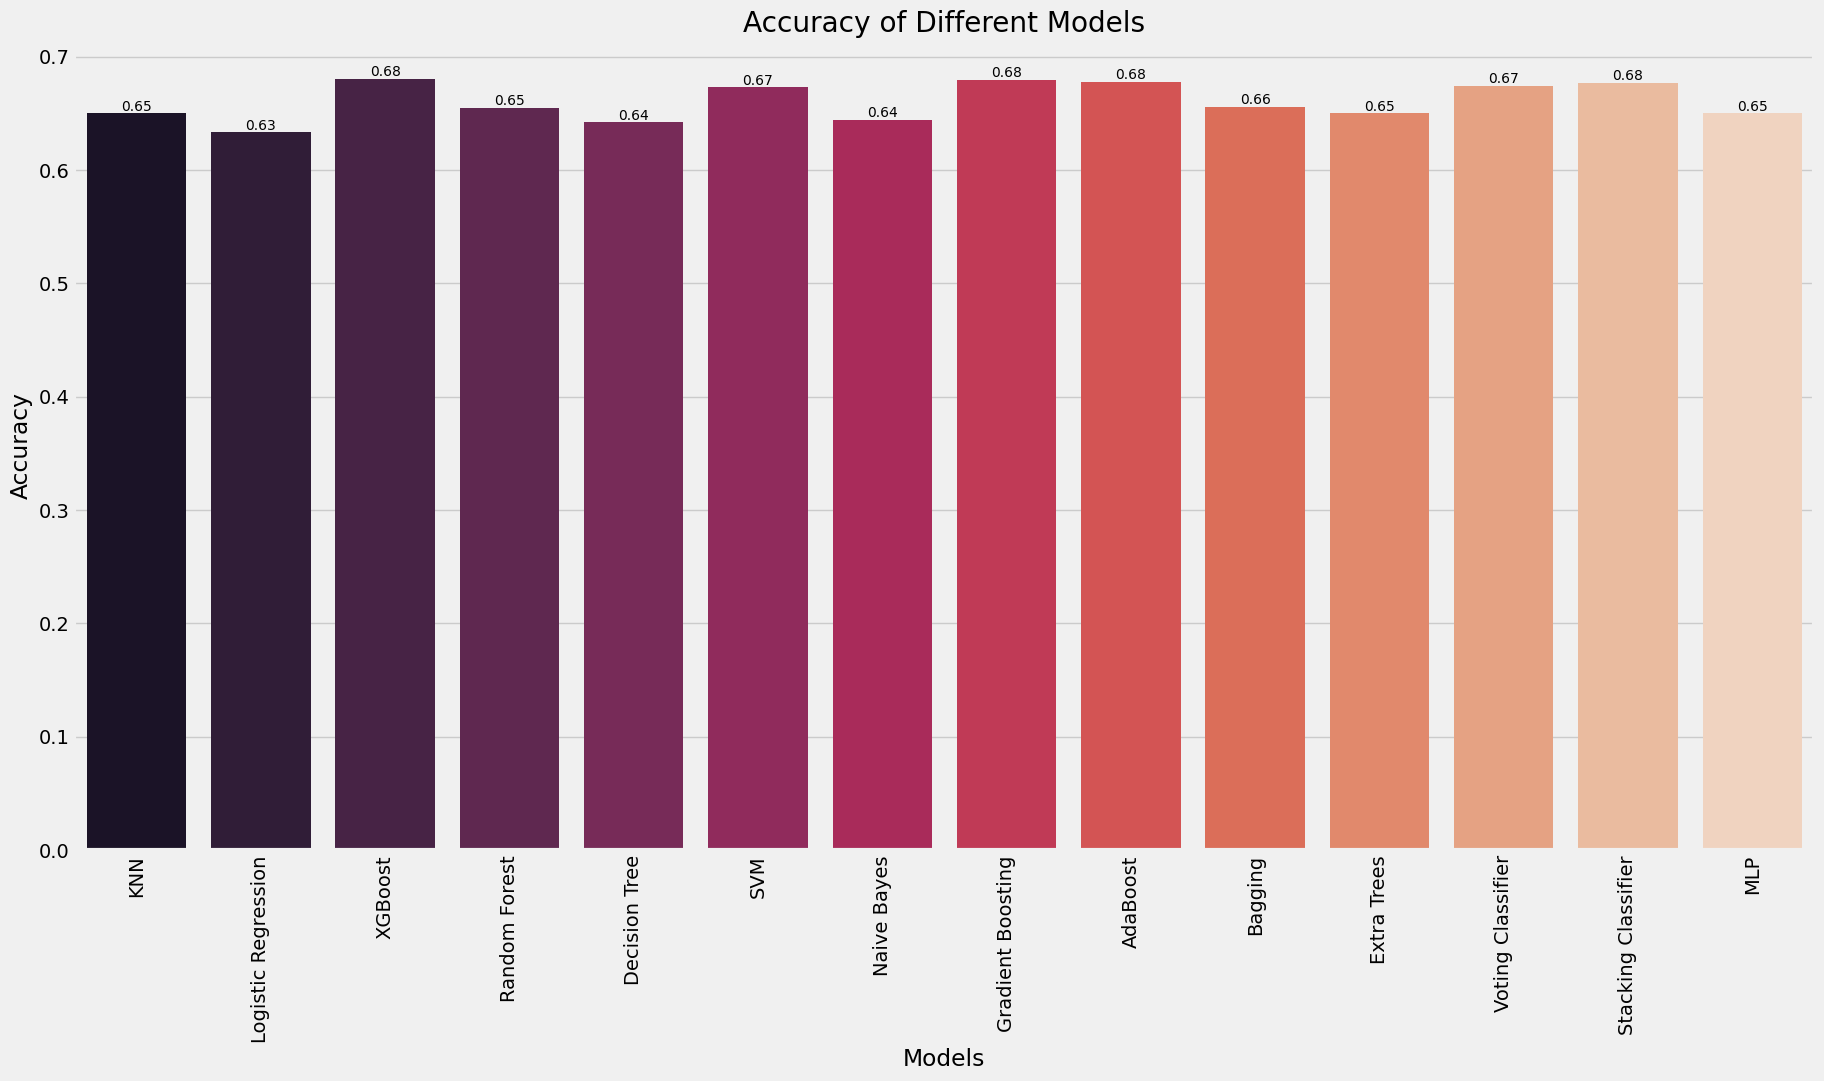

In [64]:
models = ['KNN', 'Logistic Regression', 'XGBoost', 'Random Forest', 'Decision Tree', 'SVM', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost', 'Bagging', 'Extra Trees', 'Voting Classifier', 'Stacking Classifier', 'MLP']
accuracies = [KNN_accuracy, log_accuracy, xgb_accuracy, rf_accuracy, dt_accuracy, svm_accuracy, nb_accuracy, gb_accuracy, ab_accuracy, bg_accuracy, et_accuracy, vc_accuracy, sc_accuracy, mlp_accuracy]

plt.figure(figsize=(20, 10))
sns.barplot(x=models, y=accuracies, palette='rocket')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Accuracy of Different Models')

# Add accuracy values on each bar
for i, v in enumerate(accuracies):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=90)
plt.show()



In [65]:
#Get the best 5 models
best_models = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
best_models = best_models.sort_values(by='Accuracy', ascending=False).head(5)
best_models

,Model,Accuracy
2,XGBoost,0.680364
7,Gradient Boosting,0.679273
8,AdaBoost,0.677455
12,Stacking Classifier,0.676727
11,Voting Classifier,0.674182


## Parameter optimization

In [66]:
#Now implement Grid Search using the same data
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to tune for XGBoost
params = {'n_estimators': [8, 10, 20],
          'max_depth': [2, 3, 5, 10],
          'learning_rate': [1, 0.1, 0.001],
          'objective': ['binary:logistic', 'binary:logitraw']}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=params, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Get the best hyperparameters
xgb_best_params = grid_search.best_params_

# Get the best accuracy
best_accuracy = grid_search.best_score_
best_accuracy

0.6809456364463186

In [67]:
# Define the hyperparameters to tune for Gradient Boosting
params = {'n_estimators': [50, 100, 200],
          'max_depth': [3, 5, 7],
          'learning_rate': [0.01, 0.1, 1]}
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gb, param_grid=params, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Get the best hyperparameters
gb_best_params = grid_search.best_params_


# Get the best accuracy
best_accuracy = grid_search.best_score_
best_accuracy

0.6251337384761668

In [68]:
# Define the hyperparameters to tune for Ada Boost
params = {'n_estimators': [50, 100, 200],
          'learning_rate': [0.01, 0.1, 1]}
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=ab, param_grid=params, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Get the best hyperparameters
ab_best_params = grid_search.best_params_


# Get the best accuracy
best_accuracy = grid_search.best_score_
best_accuracy


0.6121332010417958

In [69]:
# Define the hyperparameters to tune for Voting Classifier
params = {'voting': ['hard', 'soft']}
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=vc, param_grid=params, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Get the best hyperparameters
vc_best_params = grid_search.best_params_


# Get the best accuracy
best_accuracy = grid_search.best_score_
best_accuracy

0.6068557195419405

In [70]:
# Define the hyperparameters to tune for Stacking Classifier
params = {'final_estimator': [GradientBoostingClassifier(), XGBClassifier()]}
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=sc, param_grid=params, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Get the best hyperparameters
sc_best_params = grid_search.best_params_

# Get the best accuracy
best_accuracy = grid_search.best_score_
best_accuracy

0.5731303071644136

## Model testing with optimized parameters

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

### XGBoost Classifier

In [72]:
#Now implement XGBoost using the same data
xgb = XGBClassifier(n_estimators=8, max_depth=2, learning_rate=1, objective='binary:logistic')

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb= xgb.predict(X_test)

# Evaluate the model's performance
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
# Print the model performance
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", xgb_accuracy)



Precision: 0.8751248751248751
Recall: 0.5424148606811146
F1 Score: 0.6697247706422019
Accuracy: 0.6858181818181818


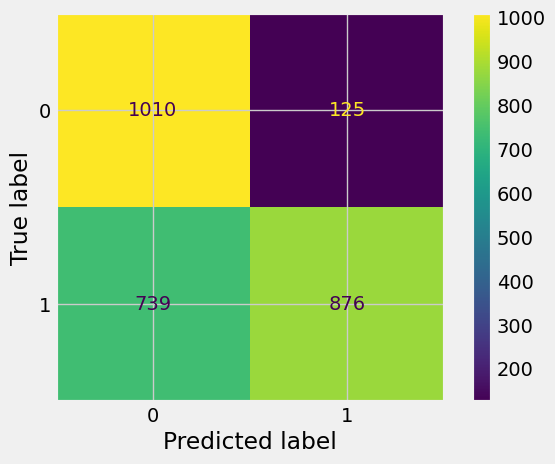

In [73]:
# Create a confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
disp.plot()
plt.show()

### Gradient Boosting Classifier

In [74]:
#Now implement Gradient Boosting using the same data
gb = GradientBoostingClassifier(n_estimators=50, max_depth=3, learning_rate=0.1)

# Train the model
gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb= gb.predict(X_test)

# Evaluate the model's performance
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
# Print the model performance
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", xgb_accuracy)

Precision: 0.9031556039173014
Recall: 0.5139318885448917
F1 Score: 0.6550907655880032
Accuracy: 0.6858181818181818


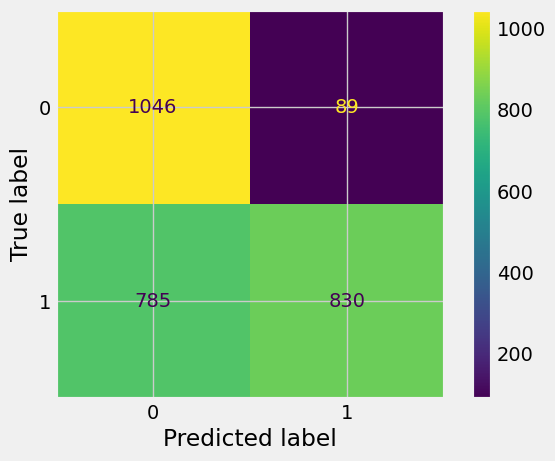

In [75]:
# Create a confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=gb.classes_)
disp.plot()
plt.show()

### AdaBoost Classifier

In [76]:
#Now implement AdaBoost using the same data
ab = AdaBoostClassifier(n_estimators=50, learning_rate=0.01)

# Train the model
ab.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ab= ab.predict(X_test)

# Evaluate the model's performance
precision = precision_score(y_test, y_pred_ab)
recall = recall_score(y_test, y_pred_ab)
f1 = f1_score(y_test, y_pred_ab)
gb_accuracy = accuracy_score(y_test, y_pred_ab)
# Print the model performance
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", gb_accuracy)

Precision: 0.7705530642750373
Recall: 0.638390092879257
F1 Score: 0.6982729427700644
Accuracy: 0.676


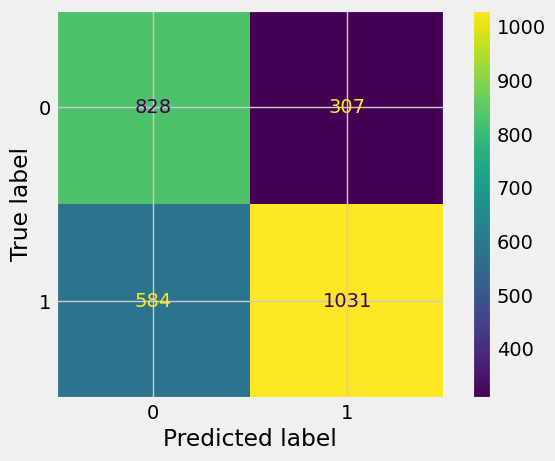

In [77]:
# Create a confusion matrix
cm_ab = confusion_matrix(y_test, y_pred_ab)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ab, display_labels=ab.classes_)
disp.plot()
plt.show()

### Voting Classifier

In [78]:
#Now implement Voting Classifier using the same data
vc = VotingClassifier(estimators=[('xgb', xgb), ('gb', gb), ('ab', ab)], voting='soft')

# Train the model
vc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_vc= vc.predict(X_test)

# Evaluate the model's performance
precision = precision_score(y_test, y_pred_vc)
recall = recall_score(y_test, y_pred_vc)
f1 = f1_score(y_test, y_pred_vc)
vc_accuracy = accuracy_score(y_test, y_pred_vc)
# Print the model performance
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", vc_accuracy)

Precision: 0.8799593082400814
Recall: 0.5356037151702786
F1 Score: 0.665896843725943
Accuracy: 0.6843636363636364


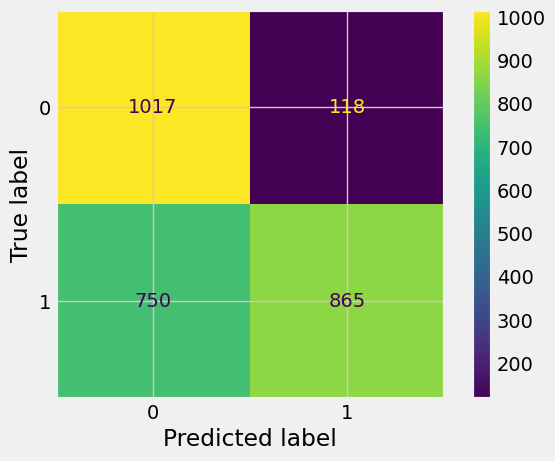

In [79]:
# Create a confusion matrix
cm_vc = confusion_matrix(y_test, y_pred_vc)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_vc, display_labels=vc.classes_)
disp.plot()
plt.show()

### Stacking Classifier

In [80]:
#Now implement Stacking Classifier using the same data
sc = StackingClassifier(estimators=[('xgb', xgb), ('gb', gb), ('ab', ab)], final_estimator=XGBClassifier(n_estimators=8, max_depth=2, learning_rate=1, objective='binary:logistic'))

# Train the model
sc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_sc= sc.predict(X_test)

# Evaluate the model's performance
precision = precision_score(y_test, y_pred_sc)
recall = recall_score(y_test, y_pred_sc)
f1 = f1_score(y_test, y_pred_sc)
sc_accuracy = accuracy_score(y_test, y_pred_sc)

# Print the model performance
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", sc_accuracy)

Precision: 0.9519230769230769
Recall: 0.4904024767801858
F1 Score: 0.6473232529628116
Accuracy: 0.6861818181818182


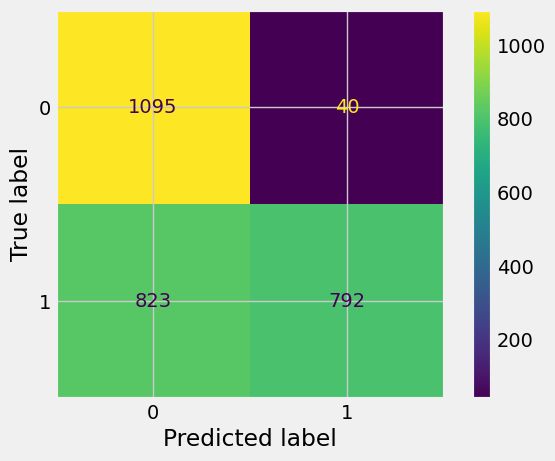

In [81]:
# Create a confusion matrix
cm_sc = confusion_matrix(y_test, y_pred_sc)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sc, display_labels=sc.classes_)
disp.plot()
plt.show()

### Results

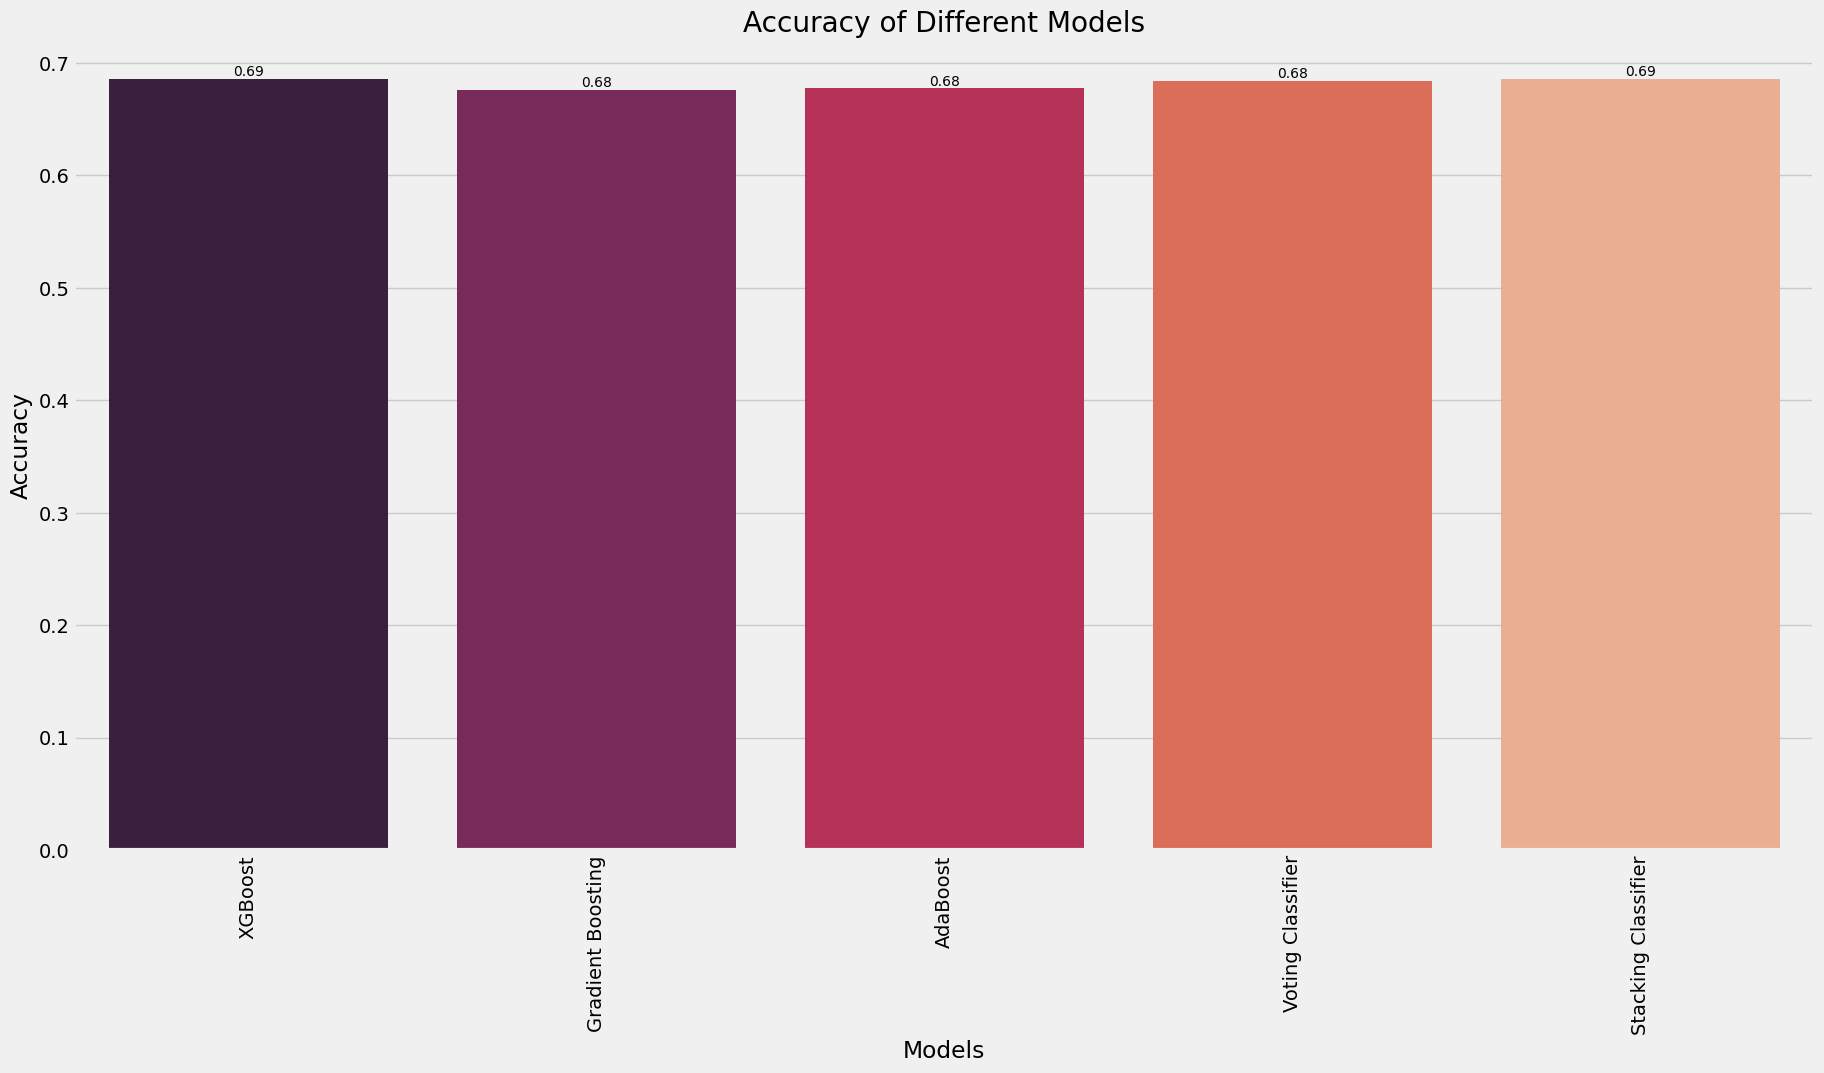

In [82]:
#Grapging the results of the new models
models = ['XGBoost', 'Gradient Boosting', 'AdaBoost', 'Voting Classifier', 'Stacking Classifier']
accuracies = [xgb_accuracy, gb_accuracy, ab_accuracy, vc_accuracy, sc_accuracy]

plt.figure(figsize=(20, 10))
sns.barplot(x=models, y=accuracies, palette='rocket')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Accuracy of Different Models')

# Add accuracy values on each bar
for i, v in enumerate(accuracies):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=90)
plt.show()



## Applying KFold Cross Validation

In [83]:
#Now implement KFold Cross Validation using the same data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Create a KFold object with 5 splits
kf = KFold(n_splits=5)

# Perform KFold cross validation on the XGBoost model
xgb_cv = cross_val_score(xgb, X, y, cv=kf, scoring='accuracy')

# Perform KFold cross validation on the Gradient Boosting model
gb_cv = cross_val_score(gb, X, y, cv=kf, scoring='accuracy')

# Perform KFold cross validation on the Ada Boost model
ab_cv = cross_val_score(ab, X, y, cv=kf, scoring='accuracy')

# Perform KFold cross validation on the Voting Classifier model
vc_cv = cross_val_score(vc, X, y, cv=kf, scoring='accuracy')

# Perform KFold cross validation on the Stacking Classifier model
sc_cv = cross_val_score(sc, X, y, cv=kf, scoring='accuracy')

#Create a table with the results
cv_results = pd.DataFrame({'Model': ['XGBoost', 'Gradient Boosting', 'AdaBoost', 'Voting Classifier', 'Stacking Classifier'],
                           'Cross Validation Accuracy': [xgb_cv.mean(), gb_cv.mean(), ab_cv.mean(), vc_cv.mean(), sc_cv.mean()]})
cv_results

,Model,Cross Validation Accuracy
0,XGBoost,0.665411
1,Gradient Boosting,0.676502
2,AdaBoost,0.639229
3,Voting Classifier,0.674956
4,Stacking Classifier,0.615954


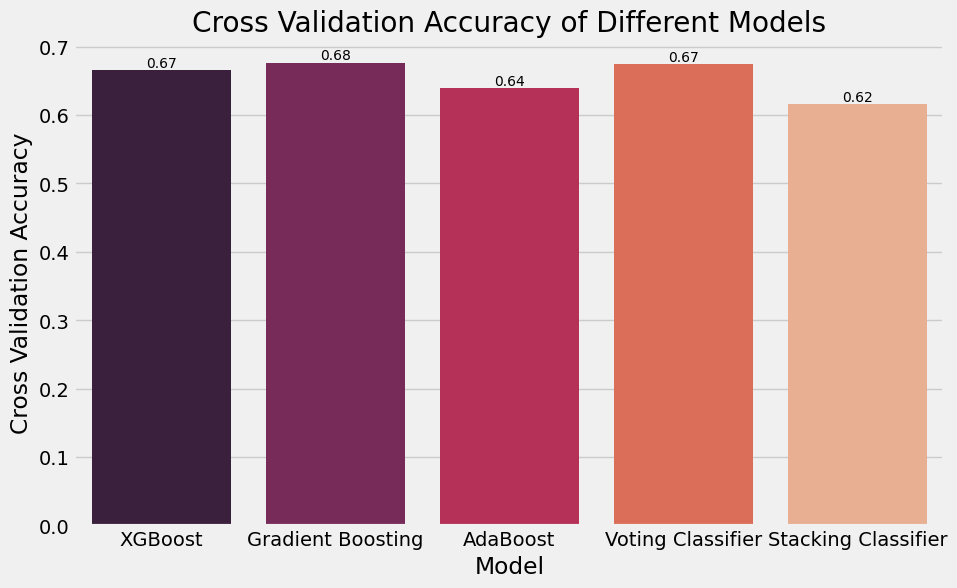

In [84]:
# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Cross Validation Accuracy', data=cv_results, palette='rocket')
# Add accuracy values on each bar
for i, v in enumerate(cv_results['Cross Validation Accuracy']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

plt.ylabel('Cross Validation Accuracy')
plt.title('Cross Validation Accuracy of Different Models')
plt.show()

## Feature importance using XGBoost Classifier

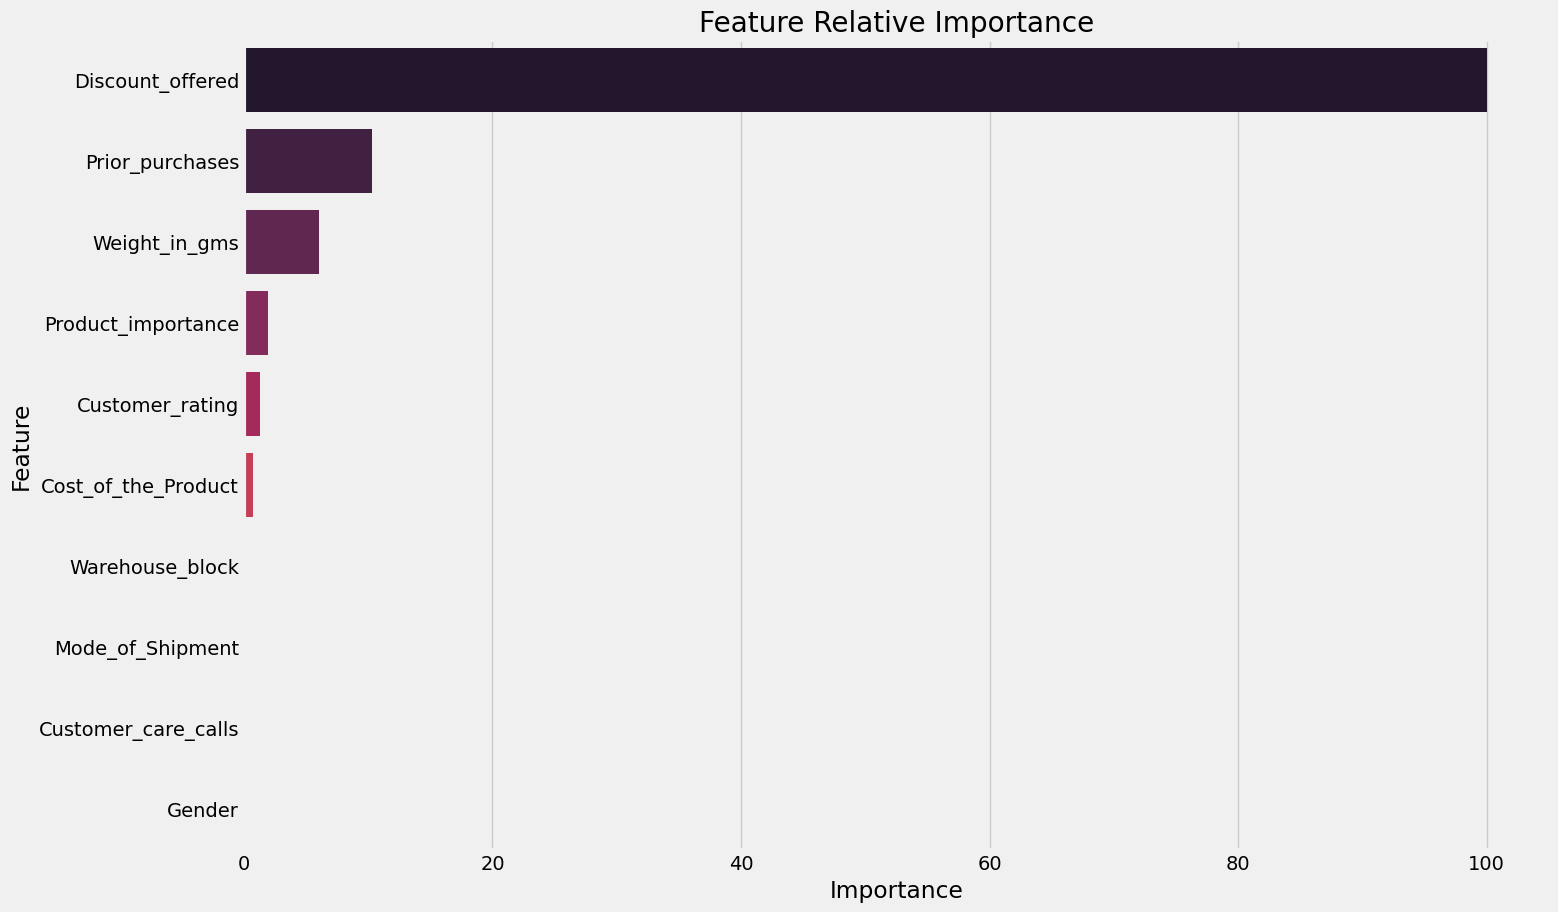

In [85]:
# Plot feature importance
feature_importance = xgb.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
# Get the feature names
feature_names = df.columns[:-1]
# Create a dataframe of feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Plot the feature importance
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket')
plt.title('Feature Relative Importance')
plt.show()